#   **Ghamgui Mohamed Amine ** 


#   dataset :Twitch Social Networks
Description
These datasets used for node classification and transfer learning are Twitch user-user networks of gamers who stream in a certain language. Nodes are the users themselves and the links are mutual friendships between them. Vertex features are extracted based on the games played and liked, location and streaming habits. Datasets share the same set of node features, this makes transfer learning across networks possible. These social networks were collected in May 2018. The supervised task related to these networks is binary node classification - one has to predict whether a streamer uses explicit language.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import networkx as nx
import matplotlib.pyplot as plt
import collections

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\DE.json
.\DE_edges.csv
.\DE_target.csv
.\file.ipynb
.\file1.ipynb


#   importation des donnèes 

In [2]:
with open("DE.json") as json_data:
    data_raw = json.load(json_data)


edge_data = pd.read_csv('DE_edges.csv')
target_data = pd.read_csv('DE_target.csv')
target_data['mature'] = target_data['mature'].astype(int)

edge_data.head()

,from,to
0,0,9206
1,0,7787
2,0,2145
3,0,2684
4,0,7275


In [8]:
target_data.shape


(9498, 6)

In [23]:
data_raw['3165']

[308,
 3152,
 653,
 811,
 48,
 920,
 224,
 810,
 3142,
 2534,
 2585,
 569,
 2384,
 2362,
 996,
 1113]

In [13]:
i=0
for j in data_raw.keys():
    i=i+1
print(i)

9498


In [14]:
edge_data.shape

(153138, 2)

In [5]:
target_data.head()

,id,days,mature,views,partner,new_id
0,37905227,2149,1,162078,False,5079
1,63102384,1574,1,1370,False,4281
2,109414094,1034,1,6043,False,992
3,84163849,1319,1,94298,True,9021
4,38240837,2137,1,2323,False,330


In [17]:
feats=[]
feat_counts=[]
for i in range(len(data_raw)):
    feat_counts+=[len(data_raw[str(i)])]
    feats+=data_raw[str(i)]

print("5 top nodes labels")
print(target_data.head(5).to_markdown())
print()
print("5 last nodes")
print(target_data.tail(5).to_markdown())

5 top nodes labels
|    |        id |   days |   mature |   views | partner   |   new_id |
|---:|----------:|-------:|---------:|--------:|:----------|---------:|
|  0 |  37905227 |   2149 |        1 |  162078 | False     |     5079 |
|  1 |  63102384 |   1574 |        1 |    1370 | False     |     4281 |
|  2 | 109414094 |   1034 |        1 |    6043 | False     |      992 |
|  3 |  84163849 |   1319 |        1 |   94298 | True      |     9021 |
|  4 |  38240837 |   2137 |        1 |    2323 | False     |      330 |

5 last nodes
|      |        id |   days |   mature |    views | partner   |   new_id |
|-----:|----------:|-------:|---------:|---------:|:----------|---------:|
| 9493 | 123101102 |    895 |        1 |      128 | False     |     4572 |
| 9494 |  40627165 |   2001 |        0 |       44 | False     |     6355 |
| 9495 |  50643307 |   1784 |        1 |     2038 | False     |      206 |
| 9496 |  38810779 |   2114 |        0 |      449 | False     |     7695 |
| 9497 |  583

In [19]:
len(feats)


193725

In [22]:
type(feats)

list

In [21]:
len(feat_counts)

9498

In [29]:
len(set(feats))

2514

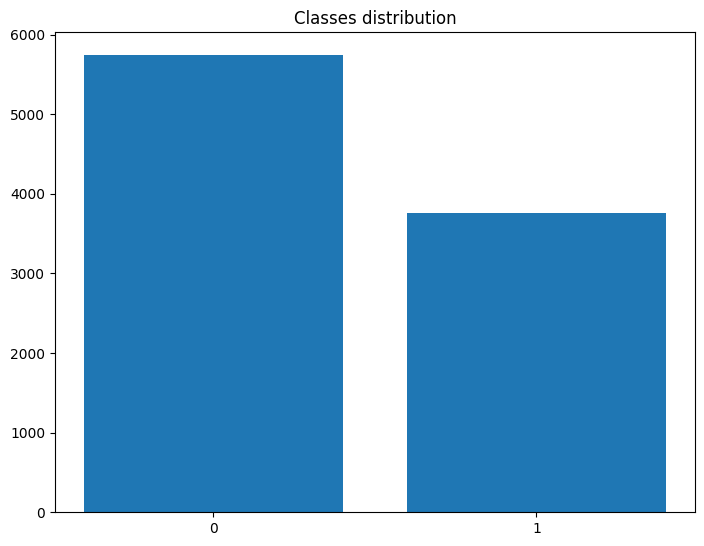

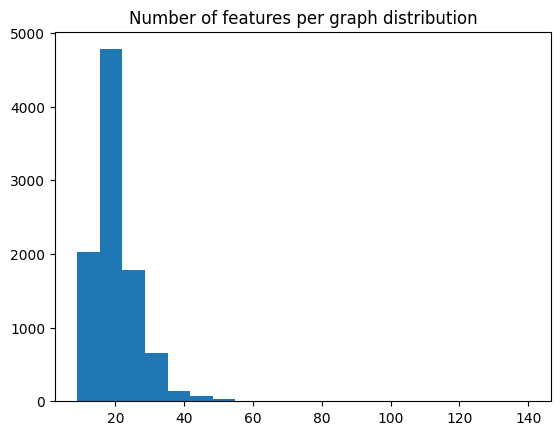

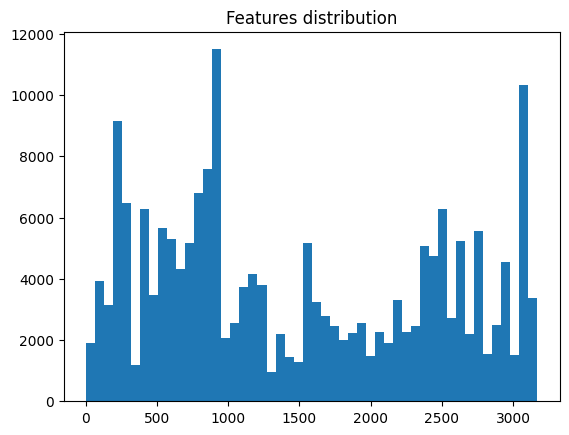

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks([0,1])
ax.bar([0,1],list(collections.Counter(target_data.mature).values()));
plt.title("Classes distribution")
plt.show()

plt.hist(feat_counts,bins=20)
plt.title("Number of features per graph distribution")
plt.show()

plt.hist(feats,bins=50)
plt.title("Features distribution")
plt.show()

In [31]:
counter=collections.Counter(feats)
print(list(counter.keys())[:10])
print(list(counter.values())[:10])
print(list(counter.keys())[-10:])
print(list(counter.values())[-10:])

[454, 2864, 17, 653, 359, 2323, 920, 1144, 1761, 760]
[320, 223, 16, 3354, 102, 942, 8901, 584, 575, 574]
[945, 3140, 2796, 2528, 2116, 3055, 2049, 1233, 2641, 1824]
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1]


In [39]:
len(counter)

2514

In [89]:
len(edge_data)

153138

#   ajouter edge_data au noeud

In [43]:
G = nx.from_pandas_edgelist(edge_data,source='from',target='to')

print('Is the graph directed ?',G.is_directed())

Is the graph directed ? False



#   centrality = nx.degree_centrality(G)

In [44]:
centrality = nx.degree_centrality(G)
centrality = sorted(centrality.items(), key=lambda item: -1*item[1])# Trie les résultats de la centralité des degrés dans l'ordre décroissant

((7787, 0.44845740760240077), 0, 14)

In [48]:
centrality[0]

(7787, 0.44845740760240077)

In [47]:
centrality


[(7787, 0.44845740760240077),
 (9206, 0.1921659471412025),
 (2684, 0.18068863851742656),
 (1638, 0.15088975465936613),
 (2914, 0.1428872275455407),
 (2816, 0.14036011372012216),
 (8803, 0.1394124460355902),
 (5893, 0.13235758660629673),
 (4927, 0.1311993261029799),
 (8262, 0.11845846056649469),
 (6652, 0.10740233758028851),
 (2145, 0.1070864483521112),
 (7275, 0.103927556070338),
 (9057, 0.1025587027482363),
 (8753, 0.10013688533221017),
 (2498, 0.09813625355375383),
 (4038, 0.09792566073496894),
 (2980, 0.09402969358744867),
 (1276, 0.0932926187217016),
 (3173, 0.08686953774876277),
 (8810, 0.08529009160787618),
 (7720, 0.0800252711382542),
 (4139, 0.07728756449405076),
 (8287, 0.07612930399073392),
 (7913, 0.07054859429293461),
 (1901, 0.06823207328630095),
 (8700, 0.06802148046751606),
 (8614, 0.06791618405812362),
 (9227, 0.06770559123933874),
 (4912, 0.06170369590396968),
 (7286, 0.06117721385700748),
 (6989, 0.06033484258186796),
 (5358, 0.05749183952827209),
 (8301, 0.0574918395

In [46]:
len(centrality)

9498

In [51]:
#len(edge_data['to'].tolist())

153138

In [13]:
edge_data[edge_data['to']==7071], edge_data[edge_data['from']==1773]

(       from    to
 10085   361  7071
 43807  1638  7071
 57077  2145  7071
 59167  2209  7071
 89551  3443  7071,
        from    to
 48480  1773  3720)

In [14]:
import heapq

heapq.nlargest(10, dict(centrality), key=dict(centrality).get)

[7787, 9206, 2684, 1638, 2914, 2816, 8803, 5893, 4927, 8262]

In [52]:
close_centrality = nx.closeness_centrality(G)

In [53]:
centrality_between = nx.betweenness_centrality(G)
#centrality_between

In [55]:
import heapq

In [56]:
heapq.nlargest(10, close_centrality, key=centrality_between.get)

[7787, 9206, 2684, 1638, 2914, 8803, 2816, 8753, 4927, 8262]

In [57]:
heapq.nlargest(10, centrality_between, key=centrality_between.get)

[7787, 9206, 2684, 1638, 2914, 8803, 2816, 8753, 4927, 8262]

#   Subgraphs
The subgraphs containing the nodes that are common in all the centrality metrics will be created in the following cell.

In [64]:
nodes = (set([7787, 9206, 2684, 1638, 2914, 8803, 2816, 8753, 4927, 8262]).intersection(set([7787, 9206, 2684, 1638, 2914, 8803, 2816, 8753, 4927, 8262]))).intersection(set([7787, 9206, 2684, 1638, 2914, 8803, 2816, 8753, 4927, 8262]))
nodes

{1638, 2684, 2816, 2914, 4927, 7787, 8262, 8753, 8803, 9206}

In [65]:
Top_streamers_subgraph = G.subgraph(list(nodes))

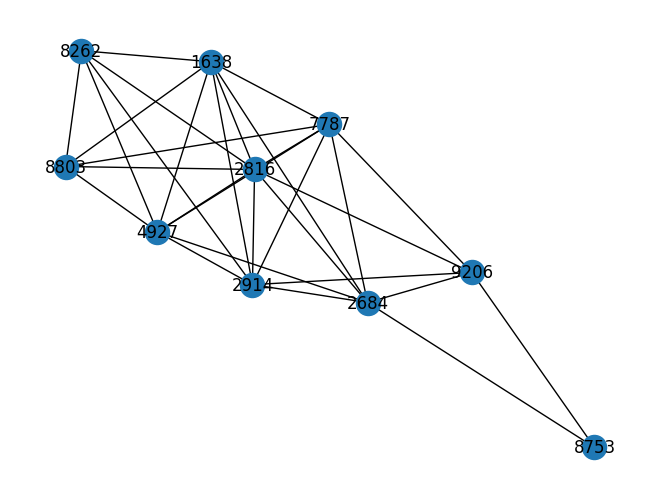

In [66]:
nx.draw(Top_streamers_subgraph,with_labels=True)

In [20]:
target_data[target_data.new_id.isin(nodes)]

,id,days,mature,views,partner,new_id
1269,42655691,2001,0,1665,False,2447
3511,47781772,1880,1,11908,False,3401
4146,48598060,1863,0,8700,False,1773
5104,80372293,1347,1,5585,False,4949
5547,29609255,2317,1,2512,False,1924
8569,28698307,2413,1,15105,False,5842


In [67]:
len(feats)

193725

In [79]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from torch_geometric.data import Data
from torch_geometric.data import DataLoader as DataLoaderGraph
from torch_geometric.data import Dataset as DatasetGraph
from torch_geometric.data import Batch as BatchGraph
from torch_geometric.transforms import RandomNodeSplit as masking

from torch_geometric.nn import GCNConv, BatchNorm, SAGEConv, SGConv, ChebConv
from torch_geometric.utils.convert import to_networkx

In [70]:
edge_data.values.tolist()

[[0, 9206],
 [0, 7787],
 [0, 2145],
 [0, 2684],
 [0, 7275],
 [0, 2498],
 [0, 5358],
 [1, 5506],
 [1, 1753],
 [1, 4361],
 [1, 2984],
 [1, 8978],
 [1, 2900],
 [1, 9151],
 [1, 3193],
 [1, 6160],
 [1, 8209],
 [1, 5682],
 [1, 4992],
 [1, 7668],
 [1, 2058],
 [1, 3164],
 [1, 2560],
 [1, 6009],
 [1, 8040],
 [1, 8873],
 [1, 1578],
 [1, 116],
 [1, 4611],
 [1, 3247],
 [1, 9407],
 [1, 3776],
 [1, 9206],
 [1, 7787],
 [1, 4575],
 [1, 4248],
 [1, 7482],
 [1, 3996],
 [1, 2152],
 [1, 7593],
 [2, 1638],
 [2, 7720],
 [2, 421],
 [2, 1276],
 [2, 7496],
 [2, 7278],
 [2, 8366],
 [2, 2794],
 [2, 3363],
 [2, 7787],
 [2, 9080],
 [2, 5822],
 [2, 2980],
 [2, 3722],
 [2, 8287],
 [2, 8803],
 [2, 6535],
 [2, 2816],
 [2, 6480],
 [3, 6522],
 [3, 8608],
 [4, 1638],
 [4, 893],
 [4, 654],
 [4, 7685],
 [4, 4042],
 [4, 2498],
 [4, 2145],
 [4, 4313],
 [4, 7787],
 [4, 3384],
 [4, 460],
 [4, 7216],
 [4, 4927],
 [7804, 1901],
 [7804, 1638],
 [7804, 8747],
 [7804, 1355],
 [7804, 7787],
 [7804, 4461],
 [7804, 3633],
 [7804, 1150

In [71]:
def construct_graph(data_encoded,light=False):
    node_features_list=list(data_encoded.values())#data sous forme de array 
    node_features=torch.tensor(node_features_list)#transformer array en tensor 
    node_labels=torch.tensor(target_data['mature'].values)#transformer target_data['mature']en array puis en tensor 
    edges_list=edge_data.values.tolist()#transformer edge_data en array  list
    edge_index01=torch.tensor(edges_list, dtype = torch.long).T#transformer edges_list en tensor ===> transformer edge_data en tensor 
    edge_index02=torch.zeros(edge_index01.shape, dtype = torch.long)# Construct bidirectional edge index (edge_index02) with zeros
    edge_index02[0,:]=edge_index01[1,:]  
    edge_index02[1,:]=edge_index01[0,:]#
    edge_index0=torch.cat((edge_index01,edge_index02),axis=1) # Concatenate edge_index01 and edge_index02 to get the final edge index (edge_index0)
    #Its utility lies in providing an efficient way to represent the connectivity pattern of nodes in a graph.
    g = Data(x=node_features, y=node_labels, edge_index=edge_index0)
    g_light = Data(x=node_features[:,0:2],
                y=node_labels   ,
                     edge_index=edge_index0[:,:55])
    if light:
        return(g_light)
    else:
        return(g)


def encode_data(light=False,n=60):
    if light==True:
        nodes_included=n
    elif light==False:
        nodes_included=len(data_raw)
    
    data_encoded={}
    for i in range(nodes_included):# 
        one_hot_feat=np.array([0]*(max(feats)+1))
        this_feat=data_raw[str(i)]
        one_hot_feat[this_feat]=1
        data_encoded[str(i)]=list(one_hot_feat)
    
    if light==True:
        sparse_feat_matrix=np.zeros((1,max(feats)+1))
        for j in range(nodes_included):
            temp=np.array(data_encoded[str(j)]).reshape(1,-1)
            sparse_feat_matrix=np.concatenate((sparse_feat_matrix,temp),axis=0)
        sparse_feat_matrix=sparse_feat_matrix[1:,:]
        return(data_encoded,sparse_feat_matrix)
    elif light==False:
        return(data_encoded, None)


In [72]:
data_encoded,_=encode_data(light=False)

In [74]:
import torch

In [76]:
from torch_geometric.data import Data


In [77]:
g=construct_graph(data_encoded=data_encoded,light=False)

In [80]:
msk=masking(split="train_rest", num_splits = 1, num_val = 0.3, num_test= 0.6)
g=msk(g)
print(g)
print()
print("training samples",torch.sum(g.train_mask).item())
print("validation samples",torch.sum(g.val_mask ).item())
print("test samples",torch.sum(g.test_mask ).item())

Data(x=[9498, 3170], edge_index=[2, 306276], y=[9498], train_mask=[9498], val_mask=[9498], test_mask=[9498])

training samples 950
validation samples 2849
test samples 5699


In [81]:
class SocialGNN(torch.nn.Module):
    def __init__(self,num_of_feat,f):
        super(SocialGNN, self).__init__()


        self.conv1 = GCNConv(num_of_feat, f)

        self.conv2 = GCNConv(f, 2)


    def forward(self, data):
        x = data.x.float()
        edge_index =  data.edge_index
          
        x = self.conv1(x=x, edge_index=edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        return x

In [82]:
def masked_loss(predictions,labels,mask):
    mask=mask.float()
    mask=mask/torch.mean(mask)
    loss=criterion(predictions,labels)
    loss=loss*mask
    loss=torch.mean(loss)
    return (loss)    

def masked_accuracy(predictions,labels,mask):
    mask=mask.float()
    mask/=torch.mean(mask)
    accuracy=(torch.argmax(predictions,axis=1)==labels).long()
    accuracy=mask*accuracy
    accuracy=torch.mean(accuracy)
    return (accuracy)    

Epoch 1/500, Train_Loss: 0.6955, Train_Accuracy: 0.4042, Val_Accuracy: 0.4093, Test_Accuracy: 0.4194
Epoch 2/500, Train_Loss: 0.6821, Train_Accuracy: 0.6116, Val_Accuracy: 0.5985, Test_Accuracy: 0.6064
Epoch 86/500, Train_Loss: 0.6388, Train_Accuracy: 0.6168, Val_Accuracy: 0.6076, Test_Accuracy: 0.6112
Epoch 87/500, Train_Loss: 0.6383, Train_Accuracy: 0.6200, Val_Accuracy: 0.6121, Test_Accuracy: 0.6148
Epoch 88/500, Train_Loss: 0.6378, Train_Accuracy: 0.6200, Val_Accuracy: 0.6132, Test_Accuracy: 0.6171
Epoch 89/500, Train_Loss: 0.6373, Train_Accuracy: 0.6211, Val_Accuracy: 0.6146, Test_Accuracy: 0.6194
Epoch 90/500, Train_Loss: 0.6369, Train_Accuracy: 0.6211, Val_Accuracy: 0.6171, Test_Accuracy: 0.6219
Epoch 91/500, Train_Loss: 0.6364, Train_Accuracy: 0.6242, Val_Accuracy: 0.6185, Test_Accuracy: 0.6240
Epoch 95/500, Train_Loss: 0.6344, Train_Accuracy: 0.6242, Val_Accuracy: 0.6195, Test_Accuracy: 0.6299
Epoch 96/500, Train_Loss: 0.6340, Train_Accuracy: 0.6242, Val_Accuracy: 0.6209, Test

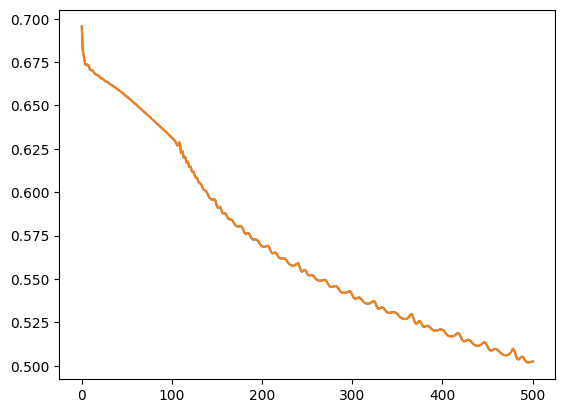

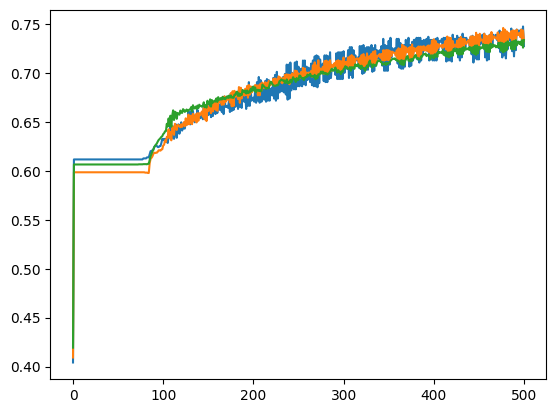

In [86]:
def train_social(net,data,epochs=10,lr=0.01):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr) # 00001
    best_accuracy=0.0
    
    train_losses=[]
    train_accuracies=[]

    val_losses=[]
    val_accuracies=[]

    test_losses=[]
    test_accuracies=[]
    data.y = data.y.long()
    for ep in range(epochs+1):
        optimizer.zero_grad()
        out=net(data)
        loss=masked_loss(predictions=out,
                         labels=data.y,
                         mask=data.train_mask)
        loss.backward()
        optimizer.step()
        train_losses+=[loss.detach()]
        train_accuracy=masked_accuracy(predictions=out,
                                       labels=data.y, 
                                       mask=data.train_mask)
        train_accuracies+=[train_accuracy]
        
        val_loss=masked_loss(predictions=out,
                             labels=data.y, 
                             mask=data.val_mask)
        val_losses+=[val_loss.detach()]
        
        val_accuracy=masked_accuracy(predictions=out,
                                     labels=data.y, 
                                     mask=data.val_mask)
        val_accuracies+=[val_accuracy]

        test_accuracy=masked_accuracy(predictions=out,
                                      labels=data.y, 
                                      mask=data.test_mask)
        test_accuracies+=[test_accuracy]
        if np.round(val_accuracy,4)> np.round(best_accuracy ,4):
            print("Epoch {}/{}, Train_Loss: {:.4f}, Train_Accuracy: {:.4f}, Val_Accuracy: {:.4f}, Test_Accuracy: {:.4f}"
                      .format(ep+1,epochs, loss.item(), train_accuracy, val_accuracy,  test_accuracy))
            best_accuracy=val_accuracy

    print(train_losses,type(train_losses))
    plt.plot(train_losses)  
    plt.plot(val_losses)
    plt.plot(test_losses)  

    plt.show()
    
    plt.plot(train_accuracies) 
    plt.plot(val_accuracies)
    #plt.plot(test_accuracies) 
    plt.show()   
    

num_of_feat=g.num_node_features
net=SocialGNN(num_of_feat=num_of_feat,f=16)
criterion=nn.CrossEntropyLoss()
train_social(net,g,epochs=500,lr=0.01)

Epoch 1/1000, Train_Loss: 0.7044, Train_Accuracy: 0.3968, Val_Accuracy: 0.4065, Test_Accuracy: 0.4002
Epoch 2/1000, Train_Loss: 0.6992, Train_Accuracy: 0.6116, Val_Accuracy: 0.5985, Test_Accuracy: 0.6064
Epoch 83/1000, Train_Loss: 0.6353, Train_Accuracy: 0.6147, Val_Accuracy: 0.6114, Test_Accuracy: 0.6138
Epoch 84/1000, Train_Loss: 0.6349, Train_Accuracy: 0.6189, Val_Accuracy: 0.6153, Test_Accuracy: 0.6194
Epoch 86/1000, Train_Loss: 0.6337, Train_Accuracy: 0.6200, Val_Accuracy: 0.6178, Test_Accuracy: 0.6229
Epoch 87/1000, Train_Loss: 0.6332, Train_Accuracy: 0.6211, Val_Accuracy: 0.6181, Test_Accuracy: 0.6233
Epoch 89/1000, Train_Loss: 0.6322, Train_Accuracy: 0.6242, Val_Accuracy: 0.6192, Test_Accuracy: 0.6271
Epoch 91/1000, Train_Loss: 0.6314, Train_Accuracy: 0.6263, Val_Accuracy: 0.6230, Test_Accuracy: 0.6308
Epoch 93/1000, Train_Loss: 0.6303, Train_Accuracy: 0.6284, Val_Accuracy: 0.6237, Test_Accuracy: 0.6326
Epoch 95/1000, Train_Loss: 0.6292, Train_Accuracy: 0.6305, Val_Accuracy: 0.

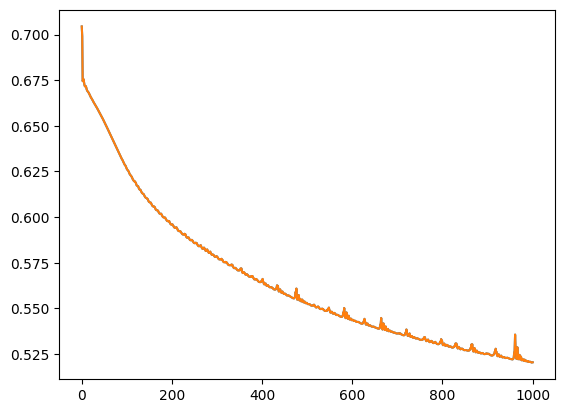

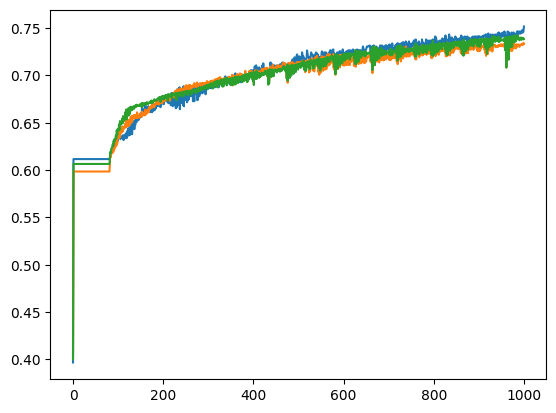

In [87]:
num_of_feat=g.num_node_features
net=SocialGNN(num_of_feat=num_of_feat,f=16)
criterion=nn.CrossEntropyLoss()
train_social(net,g,epochs=1000,lr=0.01)